In [1]:
import numpy as np
import pandas as pd
from functools import reduce

import torch
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from scipy.integrate import solve_ivp
from scipy.io import loadmat
from pysindy.utils import lotka

import pysindy as ps

import epde.interface.interface as epde_alg
from epde.interface.prepared_tokens import TrigonometricTokens, CacheStoredTokens
from epde.interface.solver_integration import BoundaryConditions, BOPElement

import matplotlib as mpl
mpl.rc('text', usetex=False)

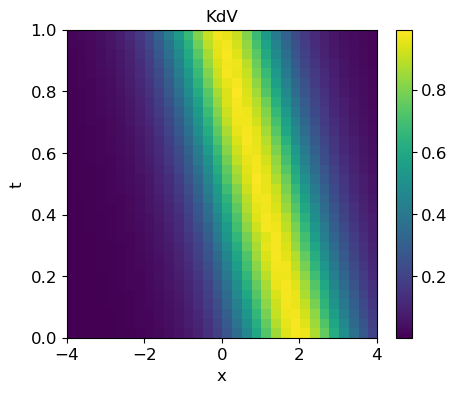

In [2]:
x = np.linspace(-4, 4, 32)  
t = np.linspace(0, 1, 32)
u = np.load('data_kdv_noise0.005.npy')  
u_x = np.load('kdv_Gradient_x_noise0.005.npy')
u_t = np.load('kdv_Gradient_t_noise0.005.npy')
u_xxx = np.load('kdv_Gradient_xxx_noise0.005.npy')
u_xx = np.load('kdv_Gradient_xx_noise0.005.npy')

plt.figure(figsize=(5, 4))
plt.imshow(u, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('KdV')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [18]:
x = np.linspace(-4, 4, 32)  
t = np.linspace(0, 1, 32)
u = np.load('data_kdv_noise0.01.npy')  
u_x = np.load('kdv_Gradient_x_noise0.01.npy')
u_t = np.load('kdv_Gradient_t_noise0.01.npy')
u_xxx = np.load('kdv_Gradient_xxx_noise0.01.npy')
u_xx = np.load('kdv_Gradient_xx_noise0.01.npy')

dt = t[1] - t[0]
dx = x[1] - x[0]

X = np.stack([u, u_x, u_xxx], axis=-1)  # (32, 32, 3)
X = X.reshape(-1, 3)  # (1024, 3)
X_dot = u_t.reshape(-1, 1)  # (1024, 1)

library_functions = [lambda x: x, lambda x, y: x * y]  # Линейные и билинейные члены
library_function_names = [lambda x: x, lambda x, y: f"{x}*{y}"]


#CustomLibrary вместо PDELibrary
custom_lib = ps.CustomLibrary(
    library_functions=library_functions,
    function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_lib, optimizer=ps.STLSQ(threshold=0.02))
model.fit(X, x_dot=X_dot)
model.print()

(x0)' = -1.816 x1 + -0.052 x2 + -0.443 x0*x1 + -0.026 x1*x2


In [19]:
x = np.linspace(-4, 4, 32)  
t = np.linspace(0, 1, 32)
u = np.load('data_kdv_noise0.01.npy')  
u_x = np.load('kdv_Adaptive_x_noise0.01.npy')
u_t = np.load('kdv_Adaptive_t_noise0.01.npy')
u_xxx = np.load('kdv_Adaptive_xxx_noise0.01.npy')
u_xx = np.load('kdv_Adaptive_xx_noise0.01.npy')

dt = t[1] - t[0]
dx = x[1] - x[0]

X = np.stack([u, u_x, u_xxx], axis=-1)  # (32, 32, 3)
X = X.reshape(-1, 3)  # (1024, 3)
X_dot = u_t.reshape(-1, 1)  # (1024, 1)

library_functions = [lambda x: x, lambda x, y: x * y]  # Линейные и билинейные члены
library_function_names = [lambda x: x, lambda x, y: f"{x}*{y}"]


#CustomLibrary вместо PDELibrary
custom_lib = ps.CustomLibrary(
    library_functions=library_functions,
    function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_lib, optimizer=ps.STLSQ(threshold=0.02))
model.fit(X, x_dot=X_dot)
model.print()

(x0)' = -0.031 x1


In [21]:
x = np.linspace(-4, 4, 32)  
t = np.linspace(0, 1, 32)
u = np.load('data_kdv_noise0.01.npy')  
u_x = np.load('kdv_Polynomial_x_noise0.01.npy')
u_t = np.load('kdv_Polynomial_t_noise0.01.npy')
u_xxx = np.load('kdv_Polynomial_xxx_noise0.01.npy')
u_xx = np.load('kdv_Polynomial_xx_noise0.01.npy')

dt = t[1] - t[0]
dx = x[1] - x[0]

X = np.stack([u, u_x, u_xxx], axis=-1)  # (32, 32, 3)
X = X.reshape(-1, 3)  # (1024, 3)
X_dot = u_t.reshape(-1, 1)  # (1024, 1)

library_functions = [lambda x: x, lambda x, y: x * y]  # Линейные и билинейные члены
library_function_names = [lambda x: x, lambda x, y: f"{x}*{y}"]


#CustomLibrary вместо PDELibrary
custom_lib = ps.CustomLibrary(
    library_functions=library_functions,
    function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_lib, optimizer=ps.STLSQ(threshold=0.02))
model.fit(X, x_dot=X_dot)
model.print()

(x0)' = -0.022 x0 + -1.698 x1 + -0.841 x0*x1 + -0.113 x0*x2 + -0.042 x1*x2


In [22]:
x = np.linspace(-4, 4, 32)  
t = np.linspace(0, 1, 32)
u = np.load('data_kdv_noise0.01.npy')  
u_x = np.load('kdv_Spectral_x_noise0.01.npy')
u_t = np.load('kdv_Spectral_t_noise0.01.npy')
u_xxx = np.load('kdv_Spectral_xxx_noise0.01.npy')
u_xx = np.load('kdv_Spectral_xx_noise0.01.npy')

dt = t[1] - t[0]
dx = x[1] - x[0]

X = np.stack([u, u_x, u_xxx], axis=-1)  # (32, 32, 3)
X = X.reshape(-1, 3)  # (1024, 3)
X_dot = u_t.reshape(-1, 1)  # (1024, 1)

library_functions = [lambda x: x, lambda x, y: x * y]  # Линейные и билинейные члены
library_function_names = [lambda x: x, lambda x, y: f"{x}*{y}"]


#CustomLibrary вместо PDELibrary
custom_lib = ps.CustomLibrary(
    library_functions=library_functions,
    function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_lib, optimizer=ps.STLSQ(threshold=0.02))
model.fit(X, x_dot=X_dot)
model.print()

(x0)' = 0.893 x1 + 0.067 x2 + -2.523 x0*x1 + 0.059 x0*x2


In [23]:
x = np.linspace(-4, 4, 32)  
t = np.linspace(0, 1, 32)
u = np.load('data_kdv_noise0.01.npy')  
u_x = np.load('kdv_Inverse_x_noise0.01.npy')
u_t = np.load('kdv_Inverse_t_noise0.01.npy')
u_xxx = np.load('kdv_Inverse_xxx_noise0.01.npy')
u_xx = np.load('kdv_Inverse_xx_noise0.01.npy')

dt = t[1] - t[0]
dx = x[1] - x[0]

X = np.stack([u, u_x, u_xxx], axis=-1)  # (32, 32, 3)
X = X.reshape(-1, 3)  # (1024, 3)
X_dot = u_t.reshape(-1, 1)  # (1024, 1)

library_functions = [lambda x: x, lambda x, y: x * y]  # Линейные и билинейные члены
library_function_names = [lambda x: x, lambda x, y: f"{x}*{y}"]


#CustomLibrary вместо PDELibrary
custom_lib = ps.CustomLibrary(
    library_functions=library_functions,
    function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_lib, optimizer=ps.STLSQ(threshold=0.02))
model.fit(X, x_dot=X_dot)
model.print()

(x0)' = -0.242 x1 + -0.030 x1*x2


In [24]:
x = np.linspace(-4, 4, 32)  
t = np.linspace(0, 1, 32)
u = np.load('data_kdv_noise0.01.npy')  
u_x = np.load('kdv_Total_x_noise0.01.npy')
u_t = np.load('kdv_Total_t_noise0.01.npy')
u_xxx = np.load('kdv_Total_xxx_noise0.01.npy')
u_xx = np.load('kdv_Total_xx_noise0.01.npy')

dt = t[1] - t[0]
dx = x[1] - x[0]

X = np.stack([u, u_x, u_xxx], axis=-1)  # (32, 32, 3)
X = X.reshape(-1, 3)  # (1024, 3)
X_dot = u_t.reshape(-1, 1)  # (1024, 1)

library_functions = [lambda x: x, lambda x, y: x * y]  # Линейные и билинейные члены
library_function_names = [lambda x: x, lambda x, y: f"{x}*{y}"]


#CustomLibrary вместо PDELibrary
custom_lib = ps.CustomLibrary(
    library_functions=library_functions,
    function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_lib, optimizer=ps.STLSQ(threshold=0.02))
model.fit(X, x_dot=X_dot)
model.print()

(x0)' = -0.047 x0 + -0.238 x1 + 4.015 x2 + 0.731 x0*x1 + -1.019 x0*x2 + 4.539 x1*x2
